In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('red-wine-quality.csv')

In [3]:
y=df.quality

In [4]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]                         

In [5]:
# PCA需数据标准化

In [6]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [7]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,0.101479
1,-0.238584,0.274930,-0.449963,0.078960,0.218735,0.411449
2,0.463632,-0.151791,0.238247,-0.079418,-0.058573,0.069593
3,0.146107,0.272080,0.101283,-0.372793,0.732144,0.049156
4,0.212247,0.148052,-0.092614,0.666195,0.246501,0.304339


# 主成分个数的选择

In [8]:
# 我以MSE为指标，利用十折交叉验证来选择主成分个数

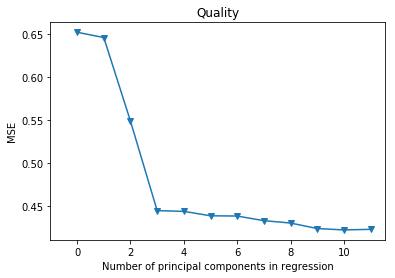

In [9]:
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# 只用截距项来做回归时的MSE
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# 对11个主成分做交叉验证，以MSE为指标, 每次增加一个主成分.
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(left=-1);

# 选择3个主成分，并用之来做回归

In [17]:
# 对数据进行标准化
X = (X - X.mean())/np.std(X)
y = (y - y.mean())/np.std(y)
# 对数据进行分割
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.8, random_state=1)
# 创建pca模型
pca_best = PCA(n_components = 3)
# 对模型进行训练
pca_best.fit(X_train)
# 返回降维后数据
X_train = pca_best.transform(X_train)

C:\Users\dyw2000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
# 使用LinearRegression进行拟合
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)   # 模型训练
lr.score(X_train, Y_train) # 获取模型的得分

0.3270821175534464

# 在测试集上的$R^2$得分

In [19]:
import statsmodels.api as sm

In [21]:
X_test = pca_best.transform(X_test)
y_pred = lr.predict(X_test)
olsr = sm.OLS(y_pred, Y_test).fit()
olsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           6.08e-27
Time:                        22:18:37   Log-Likelihood:                -205.67
No. Observations:                 320   AIC:                             413.3
Df Residuals:                     319   BIC:                             417.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quality        0.3247      0.027     11.809      0.000       0.271       0.379
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.126
Skew:                           0.145   Prob(JB):                        0.570
Kurtosis:                       2.975   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""